In [ ]:
step
0. describe, info
1.결측지
2. 이상치
3. 상관관계 sns.heatmap(df.corr())
4. 종속변수 간 변수관계 (.unstack, plotbar(stacked=True)) 달별 여행기간 
6.파생변수 생성 
7. random_state 고정
8. 범주형 변수 처리
9. 데이터 스케일링 minmaxscaler
10.그리드 서치 나 인자 변경
11.교차분석
12.회귀분석모델 정리

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
file_path='./drive/MyDrive/data/'
train_filename='train_Texi_Trip.csv'  

In [ ]:
import pandas as pd
import os
import matplotlib.pyplot as plt

In [ ]:
train = pd.read_csv(os.path.join(file_path, train_filename))

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1458644 entries, 0 to 1458643
Data columns (total 11 columns):
 #   Column              Non-Null Count    Dtype  
---  ------              --------------    -----  
 0   id                  1458644 non-null  object 
 1   vendor_id           1458644 non-null  int64  
 2   pickup_datetime     1458644 non-null  object 
 3   dropoff_datetime    1458644 non-null  object 
 4   passenger_count     1458644 non-null  int64  
 5   pickup_longitude    1458644 non-null  float64
 6   pickup_latitude     1458644 non-null  float64
 7   dropoff_longitude   1458644 non-null  float64
 8   dropoff_latitude    1458644 non-null  float64
 9   store_and_fwd_flag  1458644 non-null  object 
 10  trip_duration       1458644 non-null  int64  
dtypes: float64(4), int64(3), object(4)
memory usage: 122.4+ MB


In [ ]:
train.isna().sum()

id                    0
vendor_id             0
pickup_datetime       0
dropoff_datetime      0
passenger_count       0
pickup_longitude      0
pickup_latitude       0
dropoff_longitude     0
dropoff_latitude      0
store_and_fwd_flag    0
trip_duration         0
dtype: int64

## 종속변수 값

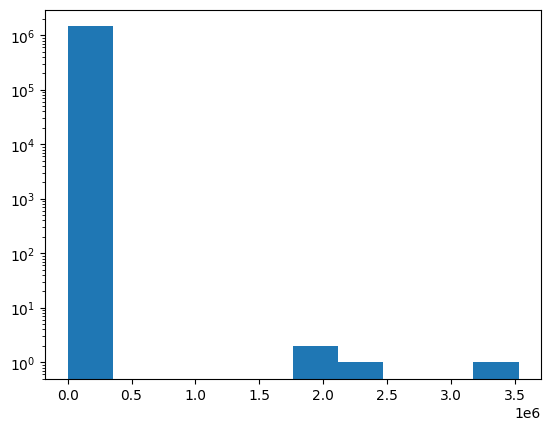

In [ ]:
import matplotlib.pyplot as plt
plt.hist(train['trip_duration'],) #value_counts() 로 도수분포표 넣는거 아님.
plt.yscale('log')

## 수치형 변수와 종속변수 간 관계

In [ ]:
obj_list = []
for col, type in zip(train.columns, train.dtypes) :
  if type == "object" :
    obj_list.append(col)

In [ ]:
b = train.columns.tolist()
for obj in obj_list :
  b.remove(obj)

<Axes: >

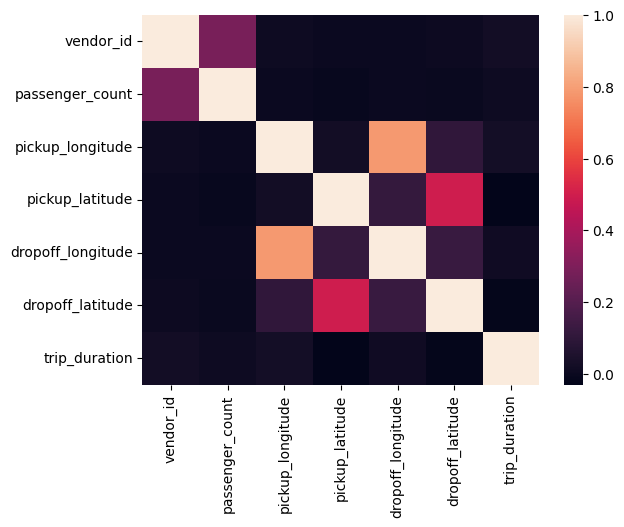

In [ ]:
import seaborn as sns
sns.heatmap(train[b].corr()) # heatmap은 범주형 변수는 제외하고 진행해야함
# trip_duration Target 컬럼 기준으로 상관관계를 보면 모든 변수가 큰 상관관계가 없다고 판단할 수 있다. 


## 범주형변수와 종속변수간의 관계

In [ ]:
train.store_and_fwd_flag.unique()

array(['N', 'Y'], dtype=object)

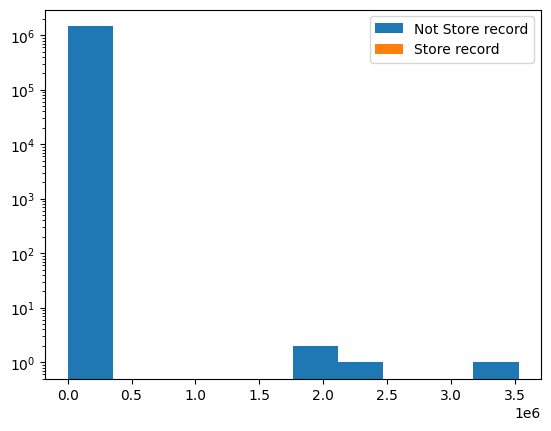

In [ ]:
# ### 연령별 생존율 히스토그램 # how_to?
plt.hist(x = [train.trip_duration[train["store_and_fwd_flag"]== 'N'], train.trip_duration[train["store_and_fwd_flag"]=='Y']], histtype = "barstacked", label = ["Not Store record","Store record"])# 
plt.legend()
# plt.ylim(0, 1000)
plt.yscale('log')

## 파생변수 생성
- 경도 위도 이용한 가장 짧은 거리 # 수치형 -> 뭉쳐있는 경우 범주형
- 탑승 하차시간 이용한 시간변수 #범주형
- 

1) 시간

In [ ]:
train['dropoff_datetime'] =  pd.to_datetime(train['dropoff_datetime'])

In [ ]:
train['pickup_datetime'] =  pd.to_datetime(train['pickup_datetime'])

In [ ]:
train['month'] = train['pickup_datetime'].map(lambda x : x.month)
train['day'] = train['pickup_datetime'].map(lambda x : x.day)
# train['weekday'] = train['pickup_datetime'].map(lambda x : x.weekday)
train['hour'] = train['pickup_datetime'].map(lambda x : x.hour)
train['minute'] = train['pickup_datetime'].map(lambda x : x.minute)

In [ ]:
train['take_time'] = (train['dropoff_datetime'])-(train['pickup_datetime'])# target 구하는 

In [ ]:
train['take_time'] = train.take_time.apply(lambda x : x.seconds) # Timestemp는 days, seconds를 구할수 있다고 함.

In [ ]:
duration_by_month=[train.trip_duration[train['month']==1], train.trip_duration[train['month']==2],train.trip_duration[train['month']==3],train.trip_duration[train['month']==4],train.trip_duration[train['month']==5],train.trip_duration[train['month']==6]]

/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 50900 (\N{HANGUL SYLLABLE WEOL}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 50900 (\N{HANGUL SYLLABLE WEOL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


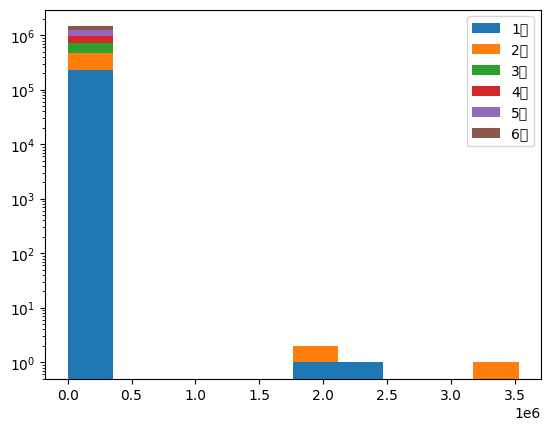

In [ ]:
plt.hist( x= duration_by_month,  histtype = "barstacked", label = ["1월", "2월","3월","4월","5월","6월"]) # 최종 변수가 연속형이므로
plt.legend()
plt.yscale("log")

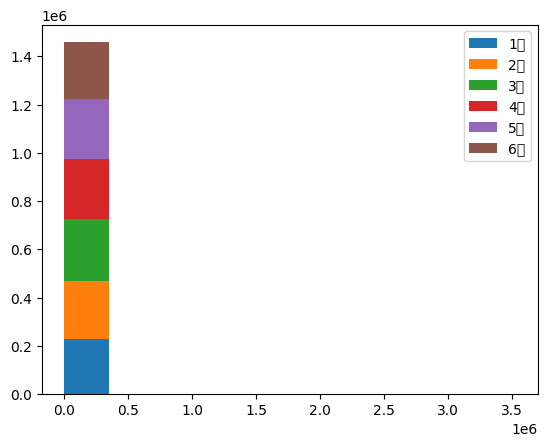

In [ ]:
plt.hist( x= duration_by_month,  histtype = "barstacked", label = ["1월", "2월","3월","4월","5월","6월"]) # 최종 변수가 연속형이므로
plt.legend()

2) 거리

In [ ]:
train['horizon_length'] = abs(train['pickup_longitude'] -train['dropoff_longitude'])

In [ ]:
train['vertical_length'] = abs(train['pickup_latitude'] -train['dropoff_latitude'])

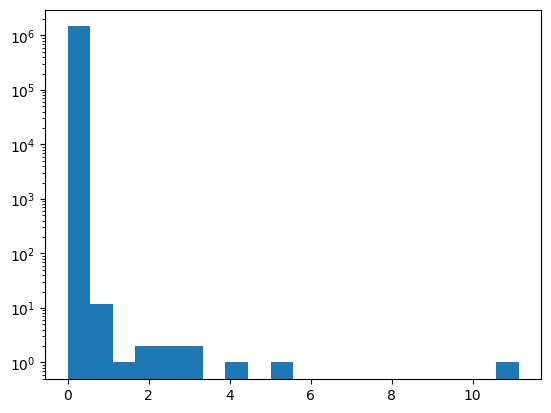

In [ ]:
vma =train['vertical_length'].max()
vmi = train['vertical_length'].min()

plt.hist('vertical_length', data = train, range=(min(0, vmi),vma ), bins = 20) # plt.hist(train['vertical_dist'].value_counts()) 같은 방식
# plt.xlim(0, 1)#plt.xlim(xmin,xmax)
plt.yscale('log')

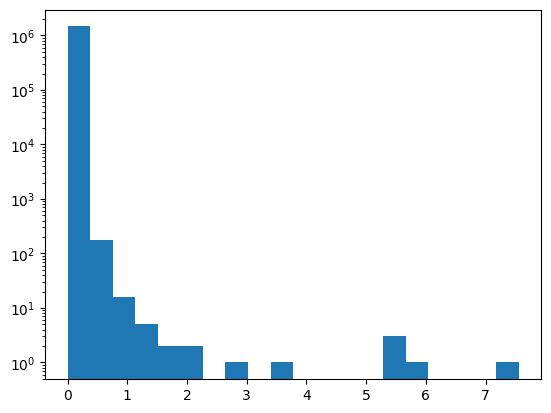

In [ ]:
vma =train['horizon_length'].max()
vmi = train['horizon_length'].min()
plt.hist('horizon_length', data = train, range=(min(0, vmi),vma ), bins=20)
plt.yscale("log")

In [ ]:
train['short_distance'] = (train['vertical_length'] *train["horizon_length"])/2

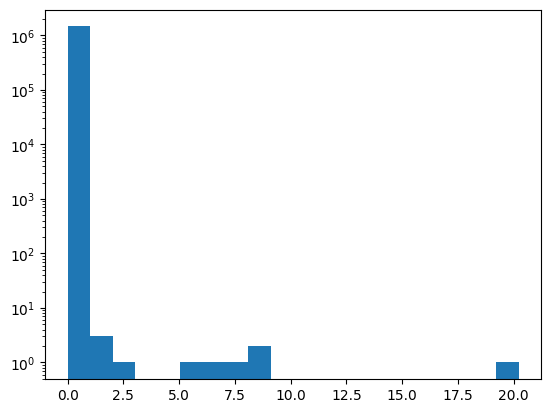

In [ ]:
vma =train['short_distance'].max()
vmi = train['short_distance'].min()
plt.hist('short_distance', data = train, range=(min(0, vmi),vma ), bins=20)
plt.yscale("log")

In [ ]:
duration_by_month[0]

2          2124
5           443
34          707
36          553
46          348
           ... 
1458623     554
1458625    2002
1458626     244
1458640     655
1458642     373
Name: trip_duration, Length: 229707, dtype: int64

In [ ]:
# 생성한 파생변수 후 컬럼 타입 분할

numeric_list = []
temp = pd.Series(train.dtypes)
numeric_list += list(temp[temp=='float64'].index)
numeric_list += list(temp[temp=='int64'].index)
numeric_list

obj_list = train.columns.difference(numeric_list)
obj_list

Index(['dropoff_datetime', 'id', 'pickup_datetime', 'store_and_fwd_flag'], dtype='object')

In [ ]:
pd.get_dummies?

In [ ]:
# 조정
train_dummy = pd.get_dummies(train, columns = ['store_and_fwd_flag'], drop_first=True)

<Axes: >

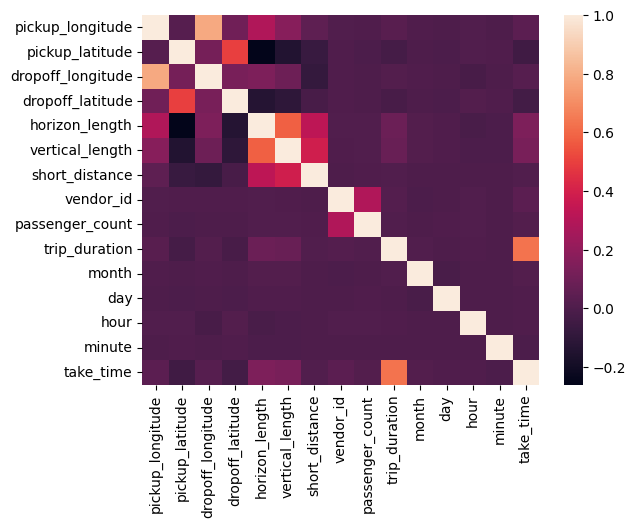

In [ ]:
sns.heatmap(train_dummy[numeric_list].corr())

In [ ]:
# random.seed # random 패키지 seed
# np.random.seed # 넘파이 피키지 seed
# # tf.random.set_seed(seed) # tensorflow global seed # operation seed는 각각 명
#  os.environ["PYTHONHASHSEED"] = str(seed) #tensor, pytorch 모두 해당
# #torch seed 고정
# torch.manual_seed(seed)
# torch.cuda.manual_seed(seed)  # type: ignore
# torch.backends.cudnn.deterministic = True  # type: ignore
# torch.backends.cudnn.benchmark = True  # type: ignore

## 데이터셋분할 및 스케일러 조정

In [ ]:
from sklearn.model_selection import train_test_split
train_dummy = train_dummy.drop(['dropoff_datetime', 'id', 'pickup_datetime',  'dropoff_latitude', 'dropoff_longitude',  'pickup_latitude', 'pickup_longitude', 'vendor_id'], axis=1 )
x= train_dummy.drop(['trip_duration'], axis=1)
y= train_dummy['trip_duration']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state=42)

#희한하네 회귀분석은 왜 values. array를 넣지? => 모델 학습 시, np.array나 dataframe 둘다 들어가는 듯함.  
# from sklearn.model_selection import train_test_split
# # train_dummy = train_dummy.drop(['dropoff_datetime', 'id', 'pickup_datetime',  'dropoff_latitude', 'dropoff_longitude',  'pickup_latitude', 'pickup_longitude', 'vendor_id'], axis=1 )
# x= train_dummy.drop(['trip_duration'], axis=1).values
# y= train_dummy['trip_duration'].values
# x_train, x_test, y_train, t_test = train_test_split(x, y, test_size = 0.2, random_state=42)

In [ ]:
x_train.columns

Index(['passenger_count', 'month', 'day', 'hour', 'minute', 'take_time',
       'horizon_length', 'vertical_length', 'short_distance',
       'store_and_fwd_flag_Y'],
      dtype='object')

In [ ]:
from sklearn.preprocessing import MinMaxScaler #스케일러 하면 df도 array가 됨
MmScaler = MinMaxScaler()
x_train_scaled = MmScaler.fit_transform(x_train)
x_test_scaled =  MmScaler.transform(x_test) # fit 이 아닌 transform

In [ ]:
x_train_scaled[0]

array([1.11111111e-01, 1.00000000e+00, 9.33333333e-01, 7.82608696e-01,
       3.55932203e-01, 1.31032168e-02, 3.83139440e-03, 1.98849129e-03,
       1.58362235e-05, 0.00000000e+00])

In [ ]:
x_test_scaled[0]

array([1.11111111e-01, 1.00000000e+00, 2.33333333e-01, 3.04347826e-01,
       6.10169492e-01, 1.20267157e-02, 6.99004726e-04, 2.20337996e-03,
       3.20140468e-06, 0.00000000e+00])

In [ ]:
# 데이터 필드
# passenger_count - 차량에 탑승한 승객 수(운전자가 입력한 값)
# pickup_longitude - 미터가 연결된 경도
# pickup_latitude - 미터가 사용된 위도
# dropoff_longitude - 미터가 해제된 경도
# dropoff_latitude - 미터가 해제된 위도
# store_and_fwd_flag - 이 플래그는 차량이 서버에 연결되어 있지 않기 때문에 벤더에게 전송하기 전에 이동 기록이 차량 메모리에 보관되었는지 여부를 나타냅니다. - Y=저장 후 전달; N=매장 아님 앞으로 여행

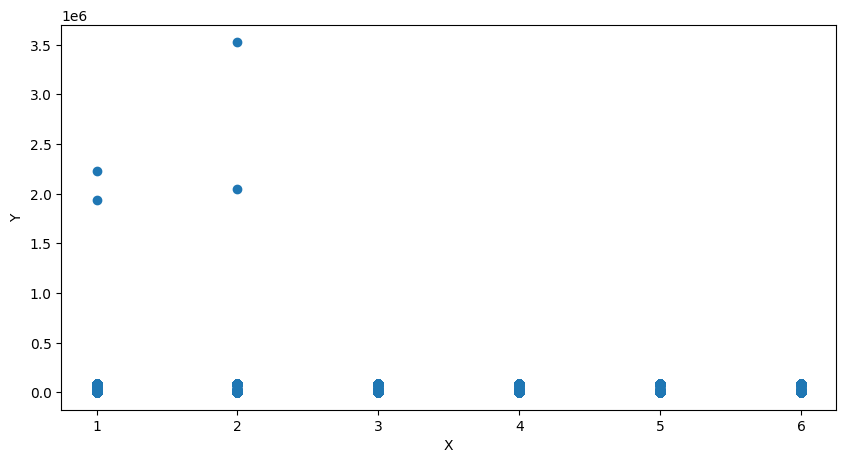

In [ ]:
#단순 회귀가 아니기 때문에 도표로 회귀선을 그릴 수 없음. 그러므로 데이터 값 확인을 위헤 전처리 과정으로 진행
x = x_train['month']
y = y_train

plt.figure(figsize = (10,5))
plt.scatter(x,y)
plt.xlabel("X")
plt.ylabel("Y")
plt.show()

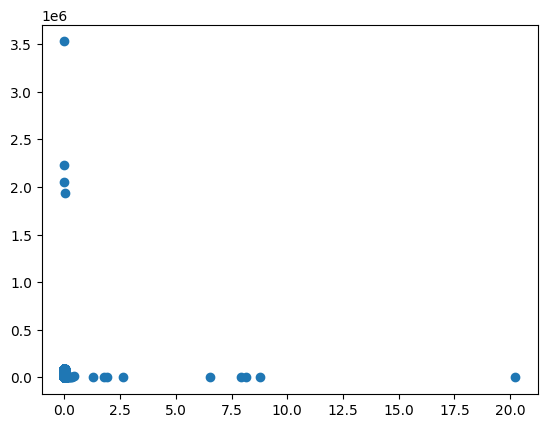

In [ ]:
x = x_train['short_distance']
y = y_train
plt.scatter(x,y)

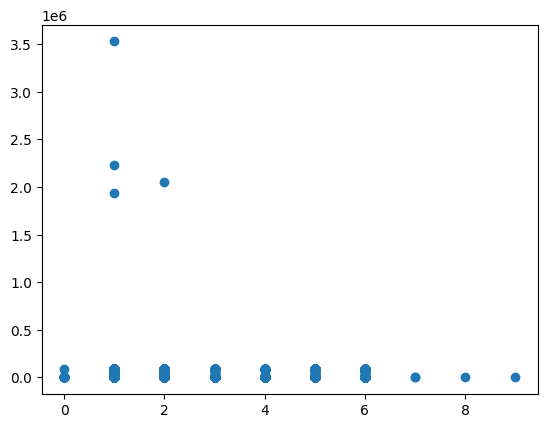

In [ ]:
x = x_train['passenger_count']
y = y_train
plt.scatter(x,y)

### 선형 회귀

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.metrics import r2_score
import numpy as np

In [ ]:

linear = LinearRegression()
linear.fit(x_train_scaled, y_train)
pred_test= linear.predict(x_test_scaled)

mae = mean_absolute_error(y_test, pred_test)
mse = mean_squared_error(y_test, pred_test)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, pred_test)
print('MAE: {0: .5f}'.format(mae))
print('MSE: {0: .5f}'.format(mse))
print('RMSE: {0: .5f}'.format(rmse))
print('R2: {0: .5f}'.format(r2))

MAE:  29.03100
MSE:  26625.86880
RMSE:  163.17435
R2:  0.99749


In [ ]:
#스케일러 하기 전과 후가 동일하네
linear = LinearRegression()
linear.fit(x_train, y_train)
pred_test= linear.predict(x_test)#.reshape(1,-1)

mae = mean_absolute_error(y_test, pred_test)
mse = mean_squared_error(y_test, pred_test)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, pred_test)
print('MAE: {0: .5f}'.format(mae))
print('MSE: {0: .5f}'.format(mse))
print('RMSE: {0: .5f}'.format(rmse))
print('R2: {0: .5f}'.format(r2))
print('ACC: {0: .5f}'.format(acc*100,3))

MAE:  29.03100
MSE:  26625.86880
RMSE:  163.17435
R2:  0.99749
ACC:  96.93681


In [ ]:
x_train.columns

Index(['passenger_count', 'month', 'day', 'hour', 'minute', 'take_time',
       'horizon_length', 'vertical_length', 'short_distance',
       'store_and_fwd_flag_Y'],
      dtype='object')

In [ ]:
print("절편", linear.intercept_,"계수", linear.coef_)

절편 -1.5625562748770108 계수 [-3.45430659e+01 -3.45771665e+01 -2.06766848e+01 -2.20312774e+00
  5.39203282e+00  9.07242978e+04 -2.22396664e+02 -1.98267189e+03
  2.26190460e+03 -1.46082302e+01]


In [ ]:
#선형 회귀모델의 결정 계수
print(linear.score(x_train,y_train))

0.3461179210671428


In [ ]:
x_train.head(2)

,passenger_count,month,day,hour,minute,take_time,horizon_length,vertical_length,short_distance,store_and_fwd_flag_Y
1053743,1,6,29,18,21,1133,0.028938,0.022133,0.000320,0
273748,1,4,25,13,3,887,0.017471,0.022385,0.000196,0


### SGD 경사하강법

In [ ]:
from sklearn.linear_model import SGDRegressor
sgd_reg = SGDRegressor(max_iter=1000, random_state = 34)
sgd_reg.fit(x_train,y_train) #fit(~~, 1차원 ).ravel 다차원을 1차우언 배열로 평범하게 펴주는 numpy

SGDRegressor(random_state=34)

In [ ]:
print("절편", sgd_reg.intercept_,"계수", sgd_reg.coef_)

절편 [-5.80942937e+10] 계수 [-3.25971089e+10  8.63058386e+10  5.22367323e+09 -1.18209103e+10
 -7.06491121e+10 -2.45269014e+10 -2.26550510e+10 -6.29019265e+09
 -2.24781664e+09 -7.66240879e+10]


In [ ]:
y_hat = sgd_reg.predict(x_test)

In [ ]:
mae = mean_absolute_error(y_test, y_hat)
mse = mean_squared_error(y_test, y_hat)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_hat)
acc = sgd_reg.score(x_test, y_hat)
print('MAE: {0: .5f}'.format(mae))
print('MSE: {0: .5f}'.format(mse))
print('RMSE: {0: .5f}'.format(rmse))
print('R2: {0: .5f}'.format(r2))
print('ACC: {0: .5f}'.format(acc*100,3))

MAE:  25537946867104.32812
MSE:  7024587722369189251240689664.00000
RMSE:  83812813592965.54688
R2: -663207397530639532032.00000
ACC:  100.00000


In [ ]:
##???  sgd는 왜 차이가 나는 거지? 

from sklearn.linear_model import SGDRegressor
sgd_reg = SGDRegressor(max_iter=1000, random_state = 34)
sgd_reg.fit(x_train_scaled, y_train) #fit(~~, 1차원 ).ravel 다차원을 1차우언 배열로 평범하게 펴주는 numpy
print("절편", sgd_reg.intercept_,"계수", sgd_reg.coef_)
y_hat = sgd_reg.predict(x_test_scaled)
mae = mean_absolute_error(y_test, y_hat)
mse = mean_squared_error(y_test, y_hat)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_hat)
acc = sgd_reg.score(x_test_scaled, y_hat)
print('MAE: {0: .5f}'.format(mae))
print('MSE: {0: .5f}'.format(mse))
print('RMSE: {0: .5f}'.format(rmse))
print('R2: {0: .5f}'.format(r2))
print('ACC: {0: .5f}'.format(acc*100,3))

절편 [71.33215464] 계수 [-2.18529235e+01 -2.93878242e+01 -2.81997535e+01 -3.07367565e+01
 -2.20130339e+00  8.43791235e+04  1.45778474e+03  5.91072172e+02
  1.09631727e+01 -9.36213119e+00]
MAE:  19.09704
MSE:  5907.51024
RMSE:  76.86033
R2:  0.99944
ACC:  100.00000


In [ ]:
x_test_scaled.shape

(291729, 10)

In [ ]:
y_hat.reshape(-1,1).shape

(291729, 1)

### 다항회귀(Polynomial Regression)
- 변수특성을 거듭제곱으로 변환하며, 주어진 차수까지 변수 간 모든 교차항을 추가한다. 
- 선형 회귀와 달리 변수들 사이의 관계를 찾을 수 있다. 
- 과적합 가능성이 있어 주의해야한다.
- (python )다항변수를 생성한 후 Linear Regression 함수에 적용하는 방법이다. 

##### 1) 다항식 조건을 먼저 세움

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
#다항식 조건 입력
poly_reg = PolynomialFeatures(degree=2) # 2차항 + 교차항

##### 2) 조건에 따른 데이터 생성

In [ ]:
# 조건에 따른 데이터 생성
X_poly = poly_reg.fit_transform(x_train)
X_test_poly= poly_reg.transform(x_test)

##### 3) 선형 회귀 모형 학습

In [ ]:
from sklearn.linear_model import LinearRegression
reg=LinearRegression()
reg.fit(X_poly, y_train)

LinearRegression()

In [ ]:
import numpy as np
pred = reg.predict(X_test_poly)

In [ ]:
mae = mean_absolute_error(y_test, pred)
mse = mean_squared_error(y_test, pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, pred)
acc = reg.score(poly_reg.transform(x_test), y_test)
print('MAE: {0: .5f}'.format(mae))
print('MSE: {0: .5f}'.format(mse))
print('RMSE: {0: .5f}'.format(rmse))
print('R2: {0: .5f}'.format(r2))
print('ACC: {0: .5f}'.format(acc*100,3))

MAE:  170.93813
MSE:  324447.84195
RMSE:  569.60323
R2:  0.96937
ACC:  96.93681


In [ ]:
# 스케일러 전후의 결과가 동일하네.
from sklearn.preprocessing import PolynomialFeatures
#다항식 조건 입력
poly_reg = PolynomialFeatures(degree=2) # 2차항 + 교차항
# 조건에 따른 데이터 생성
X_poly = poly_reg.fit_transform(x_train_scaled)

from sklearn.linear_model import LinearRegression
reg=LinearRegression()
reg.fit(X_poly, y_train)

import numpy as np
X_test_poly= poly_reg.transform(x_test_scaled)
pred = reg.predict(X_test_poly)

mae = mean_absolute_error(y_test, pred)
mse = mean_squared_error(y_test, pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, pred)
acc = reg.score(poly_reg.transform(x_test_scaled), y_test)
print('MAE: {0: .5f}'.format(mae))
print('MSE: {0: .5f}'.format(mse))
print('RMSE: {0: .5f}'.format(rmse))
print('R2: {0: .5f}'.format(r2))
print('ACC: {0: .5f}'.format(acc*100,3))

MAE:  170.93813
MSE:  324447.84206
RMSE:  569.60323
R2:  0.96937
ACC:  96.93681


### 다중 회귀 (릿지, 라쏘,엘라스틱넷)

##### 1) Lidge

In [ ]:
from sklearn.linear_model import Ridge
import numpy as np

alpha = np.logspace(-3,1,5) #0.001 ~ 100000

In [ ]:
data = []
for i, a in enumerate(alpha) :
  ridge=Ridge(alpha=a)
  ridge.fit(x_train_scaled, y_train)
  data.append(pd.Series(np.hstack([ridge.coef_])))

df_ridge = pd.DataFrame(data, index=alpha)
df_ridge.columns=x.columns
df_ridge.head()
# alpha가 커지면서 회귀계수의 값이 0에 수렴하는지 시각화

,passenger_count,month,day,hour,minute,take_time,horizon_length,vertical_length,short_distance,store_and_fwd_flag_Y
0.001,-34.542916,-34.577148,-20.676711,-2.202998,5.392037,90724.233343,-222.382257,-1981.910700,2259.889293,-14.608508
0.010,-34.541561,-34.576976,-20.676950,-2.201834,5.392072,90723.653455,-222.253723,-1975.095832,2241.892230,-14.610992
0.100,-34.527826,-34.574944,-20.679121,-2.190577,5.392262,90717.880686,-221.063960,-1910.271497,2074.861160,-14.634234
1.000,-34.379220,-34.536053,-20.688705,-2.099672,5.385179,90661.689952,-210.523287,-1465.369121,1136.036048,-14.776398
10.000,-32.710049,-33.887756,-20.619957,-1.459221,5.201464,90124.982416,68.408352,-354.799297,88.640009,-15.022695


In [ ]:
# 스케일 적용 했을때
ridge=Ridge(alpha=10)
ridge.fit(x_train_scaled, y_train)
pred = ridge.predict(x_test_scaled)

mae = mean_absolute_error(y_test, pred)
mse = mean_squared_error(y_test, pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, pred)
acc = ridge.score(x_test_scaled, y_test)
print('MAE: {0: .5f}'.format(mae))
print('MSE: {0: .5f}'.format(mse))
print('RMSE: {0: .5f}'.format(rmse))
print('R2: {0: .5f}'.format(r2))
print('ACC: {0: .5f}'.format(acc*100,3))

MAE:  27.17886
MSE:  19967.46524
RMSE:  141.30628
R2:  0.99811
ACC:  99.81148


In [ ]:
ridge=Ridge(alpha=0.001)
ridge.fit(x_train, y_train)
pred = ridge.predict(x_test)

mae = mean_absolute_error(y_test, pred)
mse = mean_squared_error(y_test, pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, pred)
acc = ridge.score(x_test, y_test)
print('MAE: {0: .5f}'.format(mae))
print('MSE: {0: .5f}'.format(mse))
print('RMSE: {0: .5f}'.format(rmse))
print('R2: {0: .5f}'.format(r2))
print('ACC: {0: .5f}'.format(acc*100,3))

MAE:  29.03100
MSE:  26625.86873
RMSE:  163.17435
R2:  0.99749
ACC:  99.74862


In [ ]:
ridge=Ridge(alpha=10)
ridge.fit(x_train, y_train)
pred = ridge.predict(x_test)

pred = ridge.predict(x_test)

mae = mean_absolute_error(y_test, pred)
mse = mean_squared_error(y_test, pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, pred)
acc = ridge.score(x_test, y_test)
print('MAE: {0: .5f}'.format(mae))
print('MSE: {0: .5f}'.format(mse))
print('RMSE: {0: .5f}'.format(rmse))
print('R2: {0: .5f}'.format(r2))
print('ACC: {0: .5f}'.format(acc*100,3))

MAE:  29.05171
MSE:  26625.16790
RMSE:  163.17220
R2:  0.99749
ACC:  99.74863


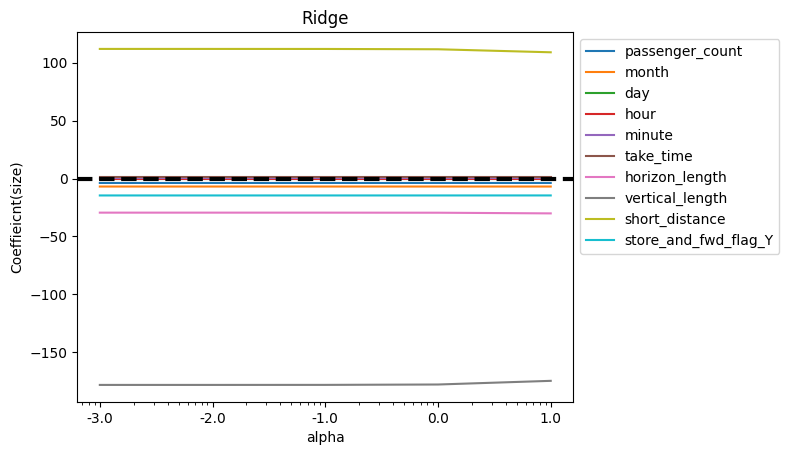

In [ ]:
plt.semilogx(df_ridge)
plt.xticks(alpha, labels=np.log10(alpha))
plt.legend(labels=df_ridge.columns, bbox_to_anchor=(1,1))
plt.title("Ridge")
plt.xlabel("alpha")
plt.ylabel("Coeffieicnt(size)")
plt.axhline(y=0, linestyle='--', color='black', linewidth=3)

##### 2) Lasso

In [ ]:
from sklearn.linear_model import Lasso

alpha = np.logspace(-3,1,5)
data=[]
for i, a in enumerate(alpha) :
  lasso=Lasso(alpha=a)
  lasso.fit(x_train, y_train)
  data.append(pd.Series(np.hstack([lasso.coef_])))

df_lasso = pd.DataFrame(data, index=alpha)
df_lasso.columns = x.columns
df_lasso

,passenger_count,month,day,hour,minute,take_time,horizon_length,vertical_length,short_distance,store_and_fwd_flag_Y
0.001,-3.837603,-6.915586,-0.689263,-0.095620,0.091411,1.050156,-29.002146,-176.149530,108.961045,-14.443619
0.010,-3.832960,-6.916958,-0.689620,-0.094105,0.091594,1.050132,-25.014910,-158.327513,82.938983,-12.962134
0.100,-3.785173,-6.915709,-0.691454,-0.083727,0.092684,1.049956,-1.458893,-30.134725,0.000000,-0.000000
1.000,-3.268499,-6.601380,-0.679370,-0.061091,0.089974,1.049915,-0.000000,-0.000000,0.000000,-0.000000
10.000,-0.000000,-3.401966,-0.552441,-0.000000,0.060314,1.049868,-0.000000,-0.000000,0.000000,-0.000000


In [ ]:
pred = lasso.predict(x_test)

mae = mean_absolute_error(y_test, pred)
mse = mean_squared_error(y_test, pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, pred)
acc = lasso.score(x_test, y_test)
print('MAE: {0: .5f}'.format(mae))
print('MSE: {0: .5f}'.format(mse))
print('RMSE: {0: .5f}'.format(rmse))
print('R2: {0: .5f}'.format(r2))
print('ACC: {0: .5f}'.format(acc*100,3))

In [ ]:
pred = lasso.predict(x_test)

mae = mean_absolute_error(y_test, pred)
mse = mean_squared_error(y_test, pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, pred)
acc = lasso.score(x_test, y_test)
print('MAE: {0: .5f}'.format(mae))
print('MSE: {0: .5f}'.format(mse))
print('RMSE: {0: .5f}'.format(rmse))
print('R2: {0: .5f}'.format(r2))
print('ACC: {0: .5f}'.format(acc*100,3))

MAE:  29.37750
MSE:  26443.68794
RMSE:  162.61515
R2:  0.99750
ACC:  99.75034


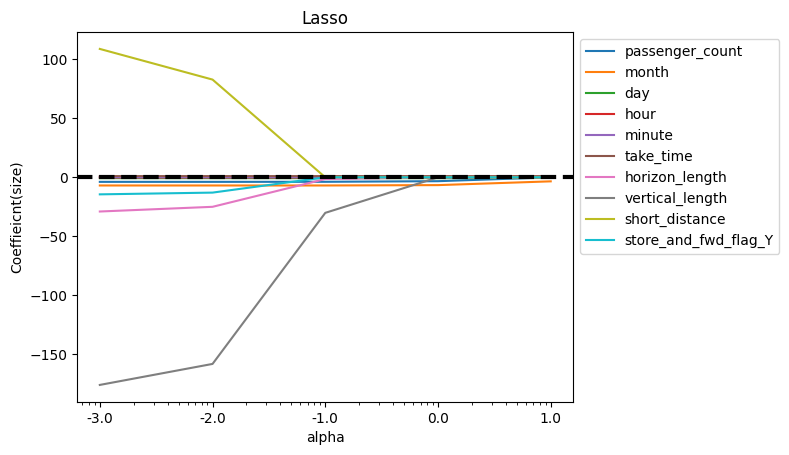

In [ ]:
plt.semilogx(df_lasso)
plt.xticks(alpha, labels=np.log10(alpha))
plt.legend(labels=df_lasso.columns, bbox_to_anchor=(1,1))
plt.title("Lasso")
plt.xlabel("alpha")
plt.ylabel("Coeffieicnt(size)")
plt.axhline(y=0, linestyle='--', color='black', linewidth=3)

##### 3) Elasticnet
- 릿지와 회귀의 규제항을 단순히 더한 수축 패널티를 가지고 있다.

In [ ]:
from sklearn.linear_model import ElasticNet

alpha = np.logspace(-3,1,5) # 
data=[]
for i, a in enumerate(alpha) :
  ela=ElasticNet(alpha=a, l1_ratio=0.5)
  ela.fit(x_train, y_train)
  data.append(pd.Series(np.hstack([ela.coef_])))

df_ela = pd.DataFrame(data, index=alpha)
df_ela.columns = x.columns
df_ela

,passenger_count,month,day,hour,minute,take_time,horizon_length,vertical_length,short_distance,store_and_fwd_flag_Y
0.001,-3.843409,-6.929202,-0.690709,-0.092745,0.091919,1.050082,-38.190140,-87.264922,39.333335,-13.639530
0.010,-3.836967,-6.935492,-0.692416,-0.087102,0.092821,1.049971,-15.923776,-18.985437,2.220652,-7.753159
0.100,-3.711298,-6.818071,-0.691843,-0.083699,0.093056,1.049923,-1.357119,-1.439306,0.000000,-0.685782
1.000,-2.756907,-5.758804,-0.679196,-0.072710,0.091559,1.049906,-0.000000,-0.000000,0.000000,-0.000000
10.000,-0.241961,-1.868089,-0.575858,-0.000000,0.075904,1.049859,-0.000000,-0.000000,0.000000,-0.000000


In [ ]:
pred = ela.predict(x_test)

mae = mean_absolute_error(y_test, pred)
mse = mean_squared_error(y_test, pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, pred)
acc = ela.score(x_test, y_test)
print('MAE: {0: .5f}'.format(mae))
print('MSE: {0: .5f}'.format(mse))
print('RMSE: {0: .5f}'.format(rmse))
print('R2: {0: .5f}'.format(r2))
print('ACC: {0: .5f}'.format(acc*100,3))

MAE:  29.20877
MSE:  26420.96009
RMSE:  162.54526
R2:  0.99751
ACC:  99.75055


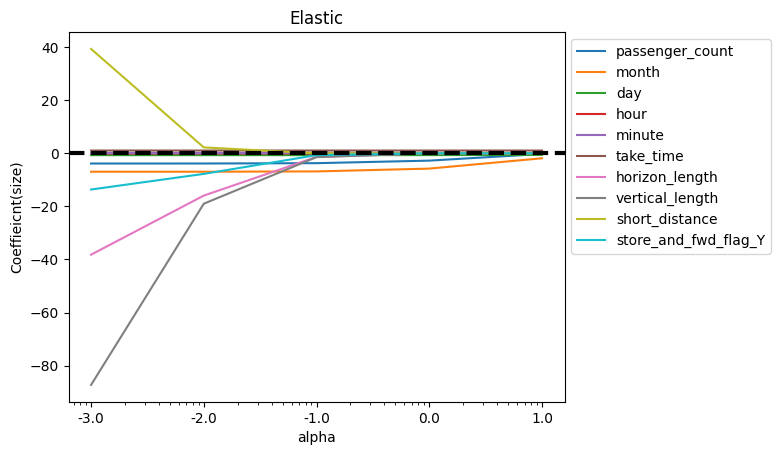

In [ ]:
plt.semilogx(df_ela)
plt.xticks(alpha, labels=np.log10(alpha))
plt.legend(labels=df_ela.columns, bbox_to_anchor=(1,1))
plt.title("Elastic")
plt.xlabel("alpha")
plt.ylabel("Coeffieicnt(size)")
plt.axhline(y=0, linestyle='--', color='black', linewidth=3)

### SVR

In [ ]:
from sklearn.svm import SVR

svr_rbf = SVR(kernel='rbf', C=100, gamma=0.1, epsilon=0.1) #랜덤포레스트 커널함수 방사형 기저함수
svr_lin = SVR(kernel='linear', C=100, gamma="auto") # 선형회귀 커널함수
svr_poly = SVR(kernel='poly', C=100, gamma="auto", degree=3, epsilon=0.1, coef0=1) # 다항회귀 커널함수

svr_rbf.fit(x_train, y_train)
svr_lin.fit(x_train, y_train)
svr_poly.fit(x_train, y_train)

In [ ]:
rbf_pred = svr_rbf.predict(x_test)
lin_pred= svr_lin.predict(x_test)
poly_pred = svr_poly.predict(x_test)

preds = [rbf_pred, lin_pred, poly_pred]
kernel = ["RANDOM FOREST", "LINEAR", "POLYNOMIAL"]
evls = ['MSE', "RMSE", "MAE"]

results = pd.DataFrame(index=kernel, columns = evls)
for pred, nm in zip(preds,kernel) :
  mse= mean_squared_error(y_test, pred)
  mae= mean_absolute_error(y_test, pred)
  rmse= np.sqrt(mse)
    

  results.loc[nm]['mse']=round(mse,2) 
  results.loc[nm]['rmse']=round(rmse,2)
  results.loc[nm]['mae']=round(mae,2)

### KneighborsRegressor

In [ ]:
이하 분류와 코드 크데 다르지 아니하여 생략

### DecisionTreeRegressor

In [ ]:
이하 분류와 코드 크데 다르지 아니하여 생략

### BaggingRegressor

In [ ]:
이하 분류와 코드 크데 다르지 아니하여 생략

### AdaBoostRegressor

In [ ]:
이하 분류와 코드 크데 다르지 아니하여 생략

### ForestRegressor

In [ ]:
이하 분류와 코드 크데 다르지 아니하여 생략

### DNN

In [ ]:
import numpy
import tensorflow as tf
from tensorflow.keras import layers
from keras.utils import np_utils

#seed 설정
seed = 0
numpy.random.seed(seed)
# tf.set_random_seed(seed)



model = tf.keras.Sequential()
model.add(layers.Dense(12, input_shape=(10,)))
model.add(layers.Activation('relu'))

model.add(layers.Dense(12))
model.add(layers.Activation('relu'))

model.add(layers.Dense(12))
model.add(layers.Activation('relu'))

model.add(layers.Dense(1))
model.add(layers.Activation('linear'))

# model compile9Rrng
model.compile(loss="mse", 
              optimizer="adam", 
              metrics=['mae']) # 실험 후 관찰하고 싶은 metric들을 나열

model.fit(x_train, y_train, epochs=10, batch_size = 10, validation_split=0.2,
          callbacks=[tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=4)],
          verbose=2) # 원핫인코딩

scores = model.evaluate(x_test,y_test)
print('test_loss : ' , scores[0])
print('test_mae : ', scores[1])

# model.save("dnn_taxi.h5")

Epoch 1/10
93354/93354 - 129s - loss: 17854012.0000 - mae: 42.5370 - val_loss: 32404832.0000 - val_mae: 28.6057 - 129s/epoch - 1ms/step
Epoch 2/10
93354/93354 - 121s - loss: 17830082.0000 - mae: 38.7490 - val_loss: 32401020.0000 - val_mae: 21.2479 - 121s/epoch - 1ms/step
Epoch 3/10
93354/93354 - 122s - loss: 17839344.0000 - mae: 38.7531 - val_loss: 32418576.0000 - val_mae: 23.0172 - 122s/epoch - 1ms/step
Epoch 4/10
93354/93354 - 118s - loss: 17795592.0000 - mae: 34.5585 - val_loss: 32502796.0000 - val_mae: 69.8916 - 118s/epoch - 1ms/step
Epoch 5/10
93354/93354 - 121s - loss: 17823928.0000 - mae: 27.8857 - val_loss: 32395384.0000 - val_mae: 20.3677 - 121s/epoch - 1ms/step
Epoch 6/10
93354/93354 - 119s - loss: 17803430.0000 - mae: 23.1004 - val_loss: 32401440.0000 - val_mae: 17.7903 - 119s/epoch - 1ms/step
Epoch 7/10
93354/93354 - 119s - loss: 17843664.0000 - mae: 29.4810 - val_loss: 32364088.0000 - val_mae: 39.7710 - 119s/epoch - 1ms/step
Epoch 8/10
93354/93354 - 117s - loss: 17825452.0

In [ ]:
import matplotlib.pyplot as plt

fig, loss_ax = plt.subplots(figsize=(15, 5))

acc_ax = loss_ax.twinx()

loss_ax.plot(hist.history['loss'], 'y', label='train loss')   # 훈련데이터의 loss (즉, mse)
loss_ax.plot(hist.history['val_loss'], 'r', label='val loss') # 검증데이터의 loss (즉, mse)

acc_ax.plot(hist.history['mae'], 'b', label='train mae')   # 훈련데이터의 mae
acc_ax.plot(hist.history['val_mae'], 'g', label='val mae') # 검증데이터의 mae

loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
acc_ax.set_ylabel('mean_absolute_error')

loss_ax.legend(loc='upper left')
acc_ax.legend(loc='lower left')

plt.show()